# Processing and Modelling

### Data processing includes:
* one-hot-encoding nominal categorical variables and ordinal encoding ordinal variables so they can be represented appropriately in the model
* Scaling the data
* Feature selection - using regularized models

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 3)
plt.rcParams['font.family'] = 'sans-serif'

pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

In [5]:
data = pd.read_csv('../data/interim/data_interim.csv')

In [6]:
data.drop(columns='class', inplace=True)
data.head()

,checking_status,duration,credit_history,purpose,savings_status,employment,other_parties,property_magnitude,other_payment_plans,housing,y
0,<0,6,critical/other existing credit,radio/tv,no known savings,>=7,none,real estate,none,own,1
1,0<=X<200,48,existing paid,radio/tv,<100,1<=X<4,none,real estate,none,own,0
2,no checking,12,critical/other existing credit,education,<100,4<=X<7,none,real estate,none,own,1
3,<0,42,existing paid,furniture/equipment,<100,4<=X<7,guarantor,life insurance,none,for free,1
4,<0,24,delayed previously,new car,<100,1<=X<4,none,no known property,none,for free,0


In [7]:
data.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose', 'savings_status', 'employment', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'y'], dtype='object')

### Based on the data exploration in notebook 0, we know that we have columns of different data types:

• **Numeric**:

    - 'duration'
    
• **Categorical ordinal**:

    - 'employment' 
    
• **Categorical nominal**:

    - 'checking_status', 'savings_status', 'credit_history', 'purpose', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing' 

### Ordinal Encoding:
Convert ordinal categorical features into numbers that reflect that order.

In [8]:
data.employment.unique()

array(['>=7', '1<=X<4', '4<=X<7', 'unemployed', '<1'], dtype=object)

In [9]:
employment_mapping = {'unemployed': 0,
                      '<1': 1,
                     '1<=X<4': 2,
                     '4<=X<7': 3,
                     '>=7': 4}

In [10]:
data['employment'] = data['employment'].map(employment_mapping)

In [11]:
data.head()

,checking_status,duration,credit_history,purpose,savings_status,employment,other_parties,property_magnitude,other_payment_plans,housing,y
0,<0,6,critical/other existing credit,radio/tv,no known savings,4,none,real estate,none,own,1
1,0<=X<200,48,existing paid,radio/tv,<100,2,none,real estate,none,own,0
2,no checking,12,critical/other existing credit,education,<100,3,none,real estate,none,own,1
3,<0,42,existing paid,furniture/equipment,<100,3,guarantor,life insurance,none,for free,1
4,<0,24,delayed previously,new car,<100,2,none,no known property,none,for free,0


## Converting nominal categorical features to numeric representations

In [12]:
data.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose', 'savings_status', 'employment', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'y'], dtype='object')

In [13]:
data.housing.unique()

array(['own', 'for free', 'rent'], dtype=object)

In [14]:
ohe = OneHotEncoder(dtype=np.int, sparse=True)

X = pd.DataFrame(
    ohe.fit_transform(data[['checking_status', 'savings_status', 'credit_history', 'purpose', 'other_parties', 'property_magnitude', 'other_payment_plans', 
                            'housing']]).toarray(),
    columns=['checking_<0', 'checking_0<=X<200', 'no checking', 'checking_>=200', 'no known savings', 'savings_<100', 'savings_500<=X<1000', 'savings_>=1000', 
             'savings_100<=X<500', 'credit_critical/other existing credit', 'credit_existing paid', 'credit_delayed previously', 'credit_no credits/all paid', 
             'credit_all paid', 'purpose_radio/tv', 'purpose_education', 'purpose_furniture/equipment', 'purpose_new car',
       'purpose_used car', 'purpose_business', 'purpose_domestic appliance', 'purpose_repairs', 'purpose_other', 'purpose_retraining', 'other_parties_none', 
             'other_parties_guarantor', 'other_parties_co applicant', 'property_magnitude_real estate', 'property_magnitude_life insurance', 
             'property_magnitude_no known property', 'property_magnitude_car', 'other_plans_none', 'other_plans_bank', 'other_plans_stores',
            'housing_own', 'housing_for free', 'housing_rent'])

In [15]:
X.head()

,checking_<0,checking_0<=X<200,no checking,checking_>=200,no known savings,savings_<100,savings_500<=X<1000,savings_>=1000,savings_100<=X<500,credit_critical/other existing credit,credit_existing paid,credit_delayed previously,credit_no credits/all paid,credit_all paid,purpose_radio/tv,purpose_education,purpose_furniture/equipment,purpose_new car,purpose_used car,purpose_business,purpose_domestic appliance,purpose_repairs,purpose_other,purpose_retraining,other_parties_none,other_parties_guarantor,other_parties_co applicant,property_magnitude_real estate,property_magnitude_life insurance,property_magnitude_no known property,property_magnitude_car,other_plans_none,other_plans_bank,other_plans_stores,housing_own,housing_for free,housing_rent
0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0
2,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0
3,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0
4,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0


In [16]:
X.shape

(1000, 37)

In [17]:
data.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose', 'savings_status', 'employment', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'y'], dtype='object')

**Add `employment` and `duration` to the new dataset `X`**

In [18]:
X['employment']= data['employment']

In [19]:
X['duration'] = data['duration']

In [20]:
X.head()

,checking_<0,checking_0<=X<200,no checking,checking_>=200,no known savings,savings_<100,savings_500<=X<1000,savings_>=1000,savings_100<=X<500,credit_critical/other existing credit,credit_existing paid,credit_delayed previously,credit_no credits/all paid,credit_all paid,purpose_radio/tv,purpose_education,purpose_furniture/equipment,purpose_new car,purpose_used car,purpose_business,purpose_domestic appliance,purpose_repairs,purpose_other,purpose_retraining,other_parties_none,other_parties_guarantor,other_parties_co applicant,property_magnitude_real estate,property_magnitude_life insurance,property_magnitude_no known property,property_magnitude_car,other_plans_none,other_plans_bank,other_plans_stores,housing_own,housing_for free,housing_rent,employment,duration
0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,4,6
1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,2,48
2,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,3,12
3,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,3,42
4,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,2,24


In [21]:
X.shape

(1000, 39)

# Model Building
Assess performance of classification models Logistic Regression and a Support Vector Machine

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

In [23]:
y = data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Support Vector Machine

In [24]:
SVC()

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [25]:
pipe_svc = Pipeline([('scl', StandardScaler()),
                    ('clf', SVC(random_state=1))])

#                     ('clf', SVC(class_weight='balanced', random_state=1))])


param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'clf__C': param_range,
              'clf__kernel': ['linear']},
             {'clf__C': param_range,
             'clf__gamma': param_range,
             'clf__kernel': ['rbf']}]

svc_gs = GridSearchCV(estimator=pipe_svc,
                 param_grid=param_grid,
                 scoring='accuracy',
                 cv=10,
                 n_jobs=-1)

svc_gs = svc_gs.fit(X_train, y_train)
print(svc_gs.best_score_)
print(svc_gs.best_params_)

0.7525
{'clf__C': 100.0, 'clf__gamma': 0.001, 'clf__kernel': 'rbf'}


In [26]:
svm_model = svc_gs.best_estimator_
svm_model.fit(X_train, y_train)
print(f"Test accuracy: {svm_model.score(X_test, y_test)}")

Test accuracy: 0.8


# Logistic Regression

In [27]:
pipe_logreg = Pipeline([('scl', StandardScaler()),
                       ('clf', LogisticRegression(random_state=1))])

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'clf__penalty' : ['l1', 'l2'],
                'clf__C' : param_range,
                'clf__solver' : ['liblinear']},
                {'clf__penalty' : ['l2'],
                'clf__C' : param_range,
                'clf__solver' : ['newton-cg', 'sag', 'lbfgs']}]

# Create grid search using 5-fold cross validation
logreg_gs = GridSearchCV(estimator=pipe_logreg, 
                  param_grid=param_grid, 
                  scoring='accuracy',
                  cv=10,
                  n_jobs=-1)

logreg_gs = logreg_gs.fit(X_train, y_train)
print(logreg_gs.best_score_)
print(logreg_gs.best_params_)

0.745
{'clf__C': 1.0, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}


In [28]:
logreg_model = logreg_gs.best_estimator_
logreg_model.fit(X_train, y_train)
print(f"Test accuracy: {logreg_model.score(X_test, y_test)}")

Test accuracy: 0.765


# Performance: Confusion Matrix 

## Performance of the SVM

In [29]:
from sklearn.metrics import confusion_matrix
svm_model = svc_gs.best_estimator_
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(conf_matrix)

[[ 30  29]
 [ 11 130]]


Text(0, 0.5, 'True Label')

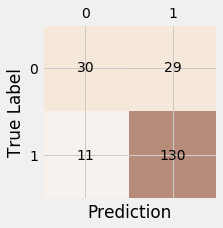

In [30]:
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.5)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center')
plt.xlabel('Prediction')
plt.ylabel('True Label')

## Performance of the Logistic Regression

In [31]:
logreg_model = logreg_gs.best_estimator_
logreg_model.fit(X_train, y_train)

y_pred = logreg_model.predict(X_test)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(conf_matrix)

[[ 23  36]
 [ 11 130]]


Text(0, 0.5, 'True Label')

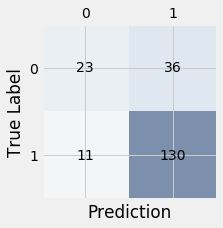

In [32]:
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.5)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center')
plt.xlabel('Prediction')
plt.ylabel('True Label')

In [33]:
print(f"True number of class 1: {len(y_test[y_test == 1])}")

True number of class 1: 141


# Summary

Support Vector Classification model performed better than the Logistic Regression model. 

Both models got the same number of positives correct (130/141).

SVC got more negatives correct (30) than the logistic model (23).

The logistic model might be a little dangerous as it predicted 36 people would be ok to lend to, where they actually were not. The SVM is safer as it only mislabelled 29 wrong here. 

Both models lead to the possible decline of a loan to 11 people. 

## Neither of these models take care of the imbalanced classes: 

In [34]:
pipe_svc = Pipeline([('scl', StandardScaler()),
                     ('clf', SVC(class_weight='balanced', random_state=1))])


param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'clf__C': param_range,
              'clf__kernel': ['linear']},
             {'clf__C': param_range,
             'clf__gamma': param_range,
             'clf__kernel': ['rbf']}]

svc_gs = GridSearchCV(estimator=pipe_svc,
                 param_grid=param_grid,
                 scoring='accuracy',
                 cv=10,
                 n_jobs=-1)

svc_gs = svc_gs.fit(X_train, y_train)
print(svc_gs.best_score_)
print(svc_gs.best_params_)

0.725
{'clf__C': 10.0, 'clf__gamma': 0.01, 'clf__kernel': 'rbf'}


/Users/jenniferstark/anaconda/envs/python36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [35]:
svm_model = svc_gs.best_estimator_
svm_model.fit(X_train, y_train)
print(f"Test accuracy: {svm_model.score(X_test, y_test)}")

Test accuracy: 0.735


In [36]:
svm_model = svc_gs.best_estimator_
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(conf_matrix)

[[ 39  20]
 [ 33 108]]


Text(0, 0.5, 'True Label')

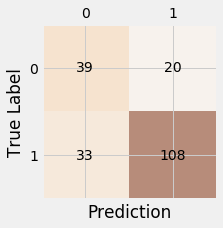

In [37]:
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.5)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center')
plt.xlabel('Prediction')
plt.ylabel('True Label')

# Summary 2:

Balancing the classes using the automated method _did_ improve classification of the underrepresented class, correctly predicting 39 true negatives vs 30 by the original SVM, or 23 by the logistic regression. There were also fewer false positives (20 here, vs 29 by the original SVM and 36 by the logistic regression). However, these improvements come at the expense of fewer true positives (108 vs 130) and more false negatives (33 vs 11). 

This approach shows some promise with more time tuning the weights and/or ensembling complimentary models together. 